In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1.Implement Principal Component Analysis (PCA) in Python on the Iris dataset to reduce the data to two principal components and visualize the transformed dataset using a scatter plot. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [9]:
X_meaned = X - np.mean(X, axis=0)

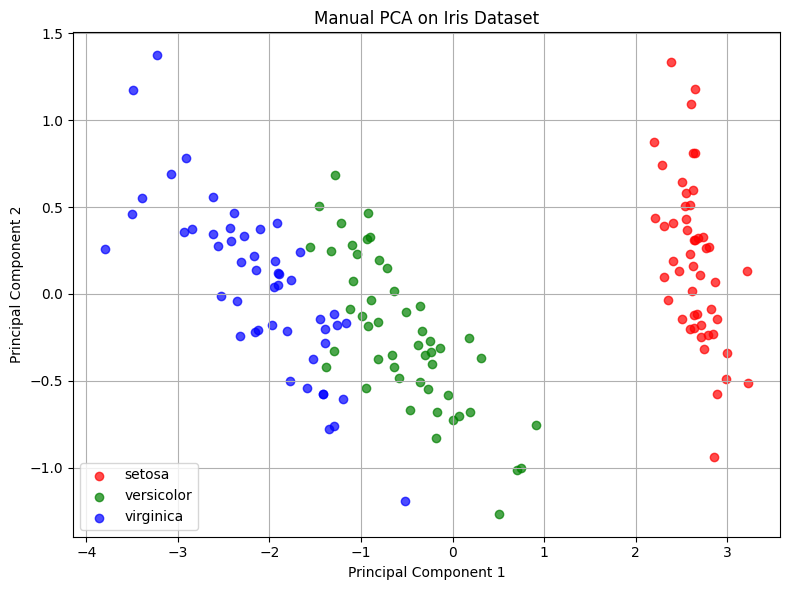

In [10]:
cov_matrix = np.cov(X_meaned, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
eigenvector_subset = sorted_eigenvectors[:, 0:2]
X_reduced = np.dot(X_meaned, eigenvector_subset)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, label=label, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Manual PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

